# 2022 CitiBike Ride Exploration and Visualization
## by Ifeoma Ugbomah

## Introduction
[Citi Bike](https://en.wikipedia.org/wiki/Citi_Bike) is New York City’s bike share system, and the largest in the nation. Citi Bike launched in May 2013 and has become an essential part of transportation network. They make commute fun, efficient and affordable – not to mention healthy and good for the environment. Download 2022 in CSV format covering New York City area [here](https://www.citibikenyc.com/system-data)

>**N.B**: The data used for this exploration is data from **`January`** to **`August`**.

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8,6) # Adjust the comfiguretion of the plots we will create.

## Gathering and Assessing Data

In [2]:
# Get monthly CSV trip files from a folder and append data together
folder_name = 'data'

# Check if the file combined file exist and pass 
# else read the CSV files to append the data together
if os.path.exists("citibike_trips_2022.csv"):
    pass
else:
    csv_files = glob.glob(os.path.join(folder_name, "*.csv"))
    # Read each CSV file into DataFrame
    # This creates a list of dataframes
    trip_list = [pd.read_csv(file) for file in csv_files]
    # Concatenate all DataFrames
    full_trip   = pd.concat(trip_list, ignore_index=True)
    
    print(full_trip.shape)
    full_trip.head()
    
    # save the appended data to a .csv file for further usage
    full_trip.to_csv('citibike_trips_2022.csv', index=False)

In [3]:
biketrips22 = pd.read_csv('citibike_trips_2022.csv')
print(biketrips22.shape)
biketrips22.head()

(580386, 13)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,CA5837152804D4B5,electric_bike,2022-01-26 18:50:39,2022-01-26 18:51:53,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member
1,BA06A5E45B6601D2,classic_bike,2022-01-28 13:14:07,2022-01-28 13:20:23,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member
2,7B6827D7B9508D93,classic_bike,2022-01-10 19:55:13,2022-01-10 20:00:37,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member
3,6E5864EA6FCEC90D,electric_bike,2022-01-26 07:54:57,2022-01-26 07:55:22,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member
4,E24954255BBDE32D,electric_bike,2022-01-13 18:44:46,2022-01-13 18:45:43,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member


In [4]:
biketrips22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580386 entries, 0 to 580385
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             580386 non-null  object 
 1   rideable_type       580386 non-null  object 
 2   started_at          580386 non-null  object 
 3   ended_at            580386 non-null  object 
 4   start_station_name  580386 non-null  object 
 5   start_station_id    580386 non-null  object 
 6   end_station_name    578377 non-null  object 
 7   end_station_id      578377 non-null  object 
 8   start_lat           580386 non-null  float64
 9   start_lng           580386 non-null  float64
 10  end_lat             578923 non-null  float64
 11  end_lng             578923 non-null  float64
 12  member_casual       580386 non-null  object 
dtypes: float64(4), object(9)
memory usage: 57.6+ MB


In [5]:
# check for null values
biketrips22.isna().sum()

ride_id                  0
rideable_type            0
started_at               0
ended_at                 0
start_station_name       0
start_station_id         0
end_station_name      2009
end_station_id        2009
start_lat                0
start_lng                0
end_lat               1463
end_lng               1463
member_casual            0
dtype: int64

In [6]:
biketrips22.duplicated().sum()

0

There are no duplicates in the data

In [7]:
biketrips22.rideable_type.value_counts()

classic_bike     383475
electric_bike    190724
docked_bike        6187
Name: rideable_type, dtype: int64

In [8]:
biketrips22.member_casual.value_counts()

member    371329
casual    209057
Name: member_casual, dtype: int64

## Issues

1. started_at and ended_at not in correct format.
2. Missing values end_station_id and end_station_name, and end_lat and end_lng.
3. Drop unnecessary columns(ride_id, start_station_id, end_station_id)
4. Create a trip duration column from started_at and ended_at.
5. Create trip start date, trip start hour of the day, day of the week and month

## Cleaning Data

In [9]:
# make a copy of the datframe
trips22 = biketrips22.copy()

#### issue 1: Change started_at and ended_at to datetime format.

In [10]:
trips22['started_at'] = pd.to_datetime(trips22['started_at'])
trips22['ended_at'] = pd.to_datetime(trips22['ended_at'])

trips22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580386 entries, 0 to 580385
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             580386 non-null  object        
 1   rideable_type       580386 non-null  object        
 2   started_at          580386 non-null  datetime64[ns]
 3   ended_at            580386 non-null  datetime64[ns]
 4   start_station_name  580386 non-null  object        
 5   start_station_id    580386 non-null  object        
 6   end_station_name    578377 non-null  object        
 7   end_station_id      578377 non-null  object        
 8   start_lat           580386 non-null  float64       
 9   start_lng           580386 non-null  float64       
 10  end_lat             578923 non-null  float64       
 11  end_lng             578923 non-null  float64       
 12  member_casual       580386 non-null  object        
dtypes: datetime64[ns](2), float64

#### issue 2: drop missing values in end_station_id and end_station_name, and end_lat and end_lng.

In [11]:
trips22 = trips22.dropna(axis=0)
trips22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 578377 entries, 0 to 580385
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             578377 non-null  object        
 1   rideable_type       578377 non-null  object        
 2   started_at          578377 non-null  datetime64[ns]
 3   ended_at            578377 non-null  datetime64[ns]
 4   start_station_name  578377 non-null  object        
 5   start_station_id    578377 non-null  object        
 6   end_station_name    578377 non-null  object        
 7   end_station_id      578377 non-null  object        
 8   start_lat           578377 non-null  float64       
 9   start_lng           578377 non-null  float64       
 10  end_lat             578377 non-null  float64       
 11  end_lng             578377 non-null  float64       
 12  member_casual       578377 non-null  object        
dtypes: datetime64[ns](2), float64

#### issue 3: Drop unnecessary columns(ride_id, start_station_id, end_station_id)

In [12]:
trips22 = trips22.drop(columns = ['ride_id', 'start_station_id', 'end_station_id'])
trips22.columns

Index(['rideable_type', 'started_at', 'ended_at', 'start_station_name',
       'end_station_name', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [13]:
# issue 4: Create a trip duration column from started_at and ended_at.
trips22['duration_minute'] = trips22['ended_at'] - trips22['started_at']
trips22['duration_minute'] = trips22['duration_minute'].dt.components.minutes
trips22.sample(5)

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,duration_minute
134339,classic_bike,2022-04-04 17:59:41,2022-04-04 18:07:45,City Hall,Liberty Light Rail,40.717732,-74.043845,40.711242,-74.055701,member,8
557892,classic_bike,2022-08-10 07:59:34,2022-08-10 08:17:54,Communipaw & Berry Lane,Columbus Dr at Exchange Pl,40.714358,-74.066611,40.716870,-74.032810,member,18
193552,classic_bike,2022-05-14 08:18:19,2022-05-14 08:26:57,Columbus Park - Clinton St & 9 St,City Hall - Washington St & 1 St,40.748161,-74.032453,40.737360,-74.030970,casual,8
376952,classic_bike,2022-07-15 10:15:15,2022-07-15 10:21:13,Columbus Park - Clinton St & 9 St,Clinton St & Newark St,40.748161,-74.032453,40.737430,-74.035710,member,5
456317,electric_bike,2022-07-18 20:45:50,2022-07-18 21:36:18,Hilltop,Bergen Ave & Sip Ave,40.731169,-74.057574,40.731009,-74.064437,member,50


#### issue 5: Create trip start date, trip start hour of the day, day of the week and month

In [14]:
trips22['start_date'] = trips22['started_at'].dt.date
trips22['start_hourofday'] = trips22['started_at'].dt.hour
trips22['start_dayofweek'] = trips22['started_at'].dt.day_name()
trips22['start_month'] = trips22['started_at'].dt.month_name()

trips22.sample(3)

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,duration_minute,start_date,start_hourofday,start_dayofweek,start_month
522076,electric_bike,2022-08-30 15:25:07,2022-08-30 15:31:18,Grove St PATH,Baldwin at Montgomery,40.719586,-74.043117,40.723659,-74.064194,casual,6,2022-08-30,15,Tuesday,August
506519,electric_bike,2022-08-03 15:26:28,2022-08-03 16:04:01,Bergen Ave,Grove St PATH,40.722104,-74.071455,40.719586,-74.043117,casual,37,2022-08-03,15,Wednesday,August
376976,classic_bike,2022-07-13 08:18:35,2022-07-13 08:21:06,Hoboken Terminal - Hudson St & Hudson Pl,Clinton St & Newark St,40.735938,-74.030305,40.737430,-74.035710,member,2,2022-07-13,8,Wednesday,July


### What is the structure of your dataset?

The original combined data contains data from January to August which is approximately 580,000 individual trip records with 13 variables collected. The variables can be divided into 3 categories:
* trip duration: `started_at`, and `ended_at`.
* station info: `start_station_name`, `start_station_id`, `end_station_name`, `end_station_id`, `start_lat`, `start_lng`, > `end_lat`, `end_lng`.
* member info: `member_casual`, `rideable_type`, and `ride_id`

Derived features/variables to assist exploration and analysis:
* trip info: `duration_minute`, `start_date`, `start_hourofday`, `start_dayofweek`, `start_month`.


### What is/are the main feature(s) of interest in your dataset?

I'm interested in exploring the bike trips' duration and rental events occurrance patterns, along with how these relate to the riders' characteristics, i.e user type(member or casual) to get a sense of how and what people are using the bike sharing services for. Sample questions to answer: When are most trips taken in term of time of day, day od week, or month of the year? How long does average trip take? Does the above depend on if a user is a casual or member user type?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Each trips' start date/time and duration information will help understand how long a trip usually takes and when. The member information user type(casual or member) will help us find out which group of the user type(member or casual) utilizes the services more, use the different groups to summarize bike usage data to see if there is any special pattern associated with the specific groups of riders.

## Univariate Exploration



A series of plots to first explore the trips distribution over hour of the day, day of the week, and month of the year.

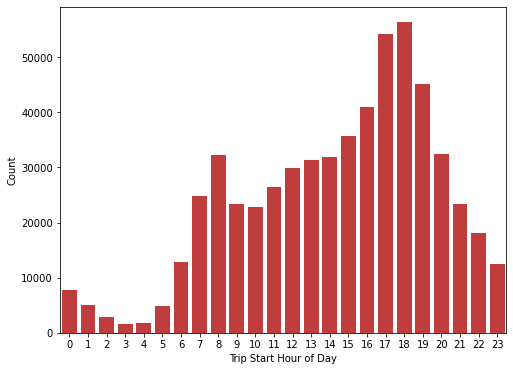

In [15]:
# trip distribution over day hours

base_color = sns.color_palette()[3]
sns.countplot(data=trips22, x='start_hourofday', color=base_color)
plt.xlabel('Trip Start Hour of Day')
plt.ylabel('Count');

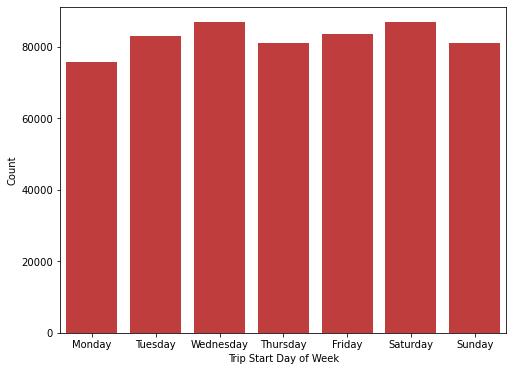

In [16]:
# trip distribution over weekdays
# change the start_dayofweek to categorical datatype
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
trips22['start_dayofweek'] = trips22['start_dayofweek'].astype(weekdaycat)

sns.countplot(data=trips22, x='start_dayofweek', color=base_color)
plt.xlabel('Trip Start Day of Week')
plt.ylabel('Count');

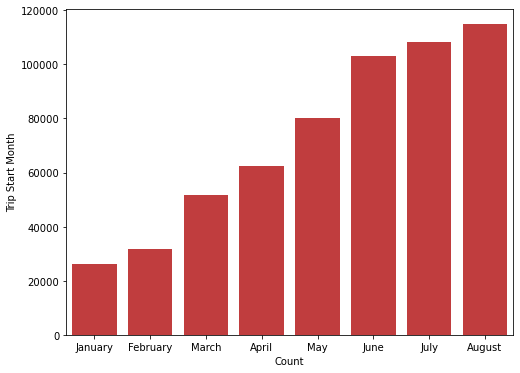

In [17]:
# trip distribution over months
# change the start_month to categorical datatype
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August']
monthcat = pd.api.types.CategoricalDtype(ordered=True, categories=month)
trips22['start_month'] = trips22['start_month'].astype(monthcat)

sns.countplot(data=trips22, x='start_month', color=base_color)
plt.xlabel('Count')
plt.ylabel('Trip Start Month');

The trip distribution over day hours is unimodel and peak around 17pm-19pm, during typical rush hours. Looking in combined with the distribution over day of week plot. With slight differnece, Saturday having the higest value with 86873 usage and Monday with least usage of 75751. For the 2022, between January to August, the ride service usage increases with month.

**N.B**: The data used for this exploration is data from **`January`** to **`August`**.

The next several plots are around user type(member or casual) and ride type(rideable_type) to have a sense of the typical user of the service.

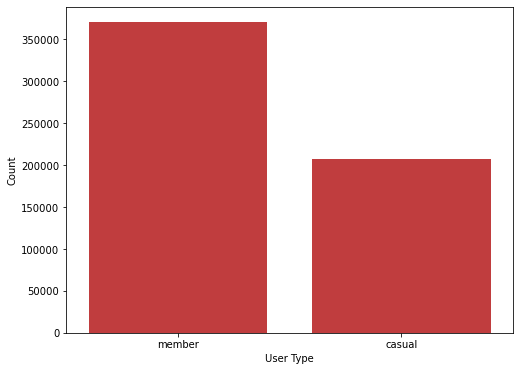

In [18]:
sns.countplot(data=trips22, x='member_casual', color=base_color)
plt.xlabel('User Type')
plt.ylabel('Count');

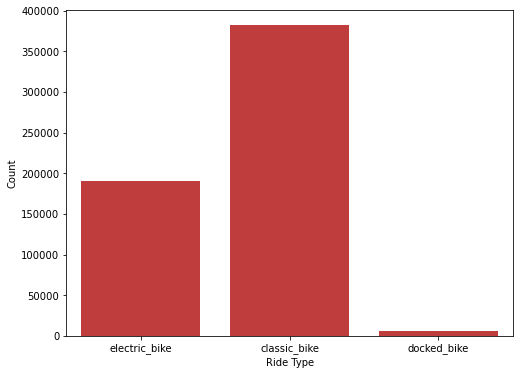

In [19]:
sns.countplot(data=trips22, x='rideable_type', color=base_color)
plt.xlabel('Ride Type')
plt.ylabel('Count');

Most riders are members and ride type are classic bike.

Trip duration distribution plot next

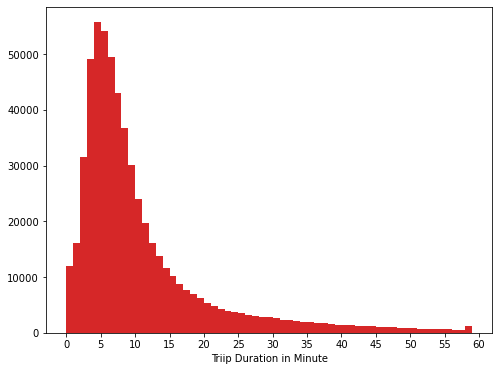

In [20]:
bins = np.arange(0, trips22['duration_minute'].max()+1, 1)
plt.hist(data=trips22, x='duration_minute', bins=bins, color=base_color)
plt.xlabel('Triip Duration in Minute')
ticks = np.arange(0, trips22['duration_minute'].max()+5, 5)
plt.xticks(ticks, ticks);

The trip distribution is right skewed with majority of the trips less than 1 hours within 4 to 7 minutes.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The number of trips peaked around 17-19pm with saturday slightly higher than other days with a value of 86873. For the 2022, between January to August, the ride service usage increases with month.

Most riders are members and ride type are classic bike.

Most rides were quick and short, lasted between 4 to 7 minutes.

There was no unusual points and no transformation was also needed due to straightforwardness of the data.

>**N.B**: The data used for this exploration is data from **`January`** to **`August`**.



### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The trips duration was extracted from the started_at and ended_at features. The start_date, start_hourofday, start_dayofweek, start_month was also gotten from started_at feature.

## Bivariate Exploration

How does the trip distribution vary between member and casual, electric bike, classic bike and docked bike?

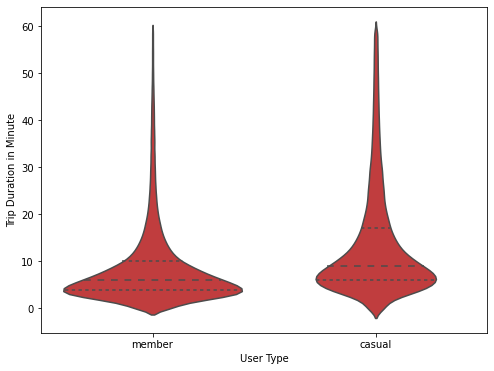

In [21]:
sns.violinplot(data=trips22, x='member_casual', y='duration_minute', color=base_color, inner='quartile')
plt.xlabel('User Type')
plt.ylabel('Trip Duration in Minute');

The trip duration distribution is much narrower for members compared to casual riders on the longer trip end overall. It seems like members have a more specific usage or targeted goal riding the bikes compared to casual who rented the bikes for long.

How does the trips duratiion distribution vary by ride type?

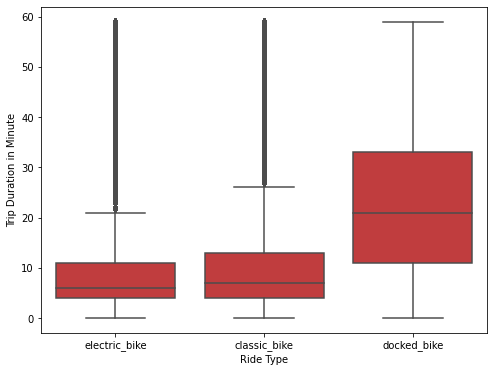

In [22]:
sns.boxplot(data=trips22, x='rideable_type', y='duration_minute', color=base_color)
plt.xlabel('Ride Type')
plt.ylabel('Trip Duration in Minute');

Though slight difference between electric and classic bikes. Docked bikes have higher trips duration.

Average Trip Duration by Hours of the Day.

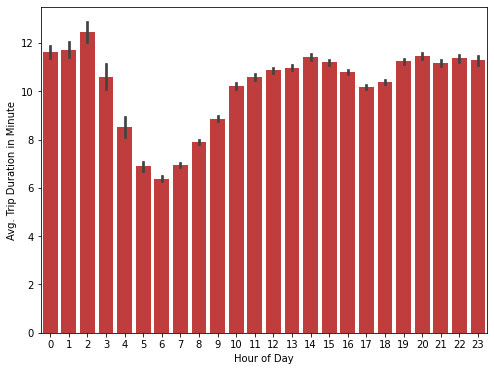

In [23]:
sns.barplot(data=trips22, x='start_hourofday', y='duration_minute', color=base_color)
plt.xlabel('Hour of Day')
plt.ylabel('Avg. Trip Duration in Minute');

The riding trips are much shorted between 4am-9am with highest usage in 2am.

Average Trip Duration on Weekdays

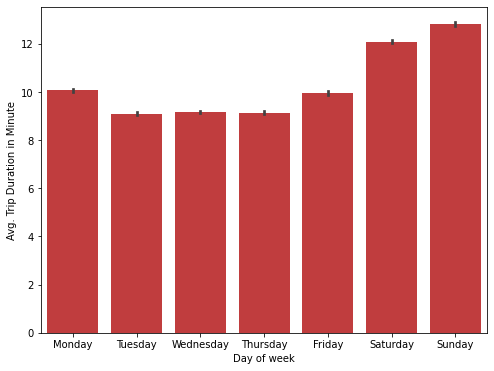

In [24]:
sns.barplot(data=trips22, x='start_dayofweek', y='duration_minute', color=base_color)
plt.xlabel('Day of week')
plt.ylabel('Avg. Trip Duration in Minute');

The riding trips are much shorted on Monday through Friday compared to weekends. It indicates a stable and efficient usage of the sharing system  on normal work days, while more casual flexible use on weekends.

Average Trip Duration on Month

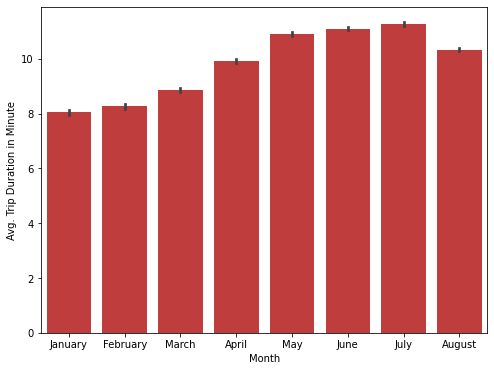

In [25]:
sns.barplot(data=trips22, x='start_month', y='duration_minute', color=base_color)
plt.xlabel('Month')
plt.ylabel('Avg. Trip Duration in Minute');

The average usage time show an increasing trend over the months from January to July with a decrease in August.

Weekly usage between members and casuals

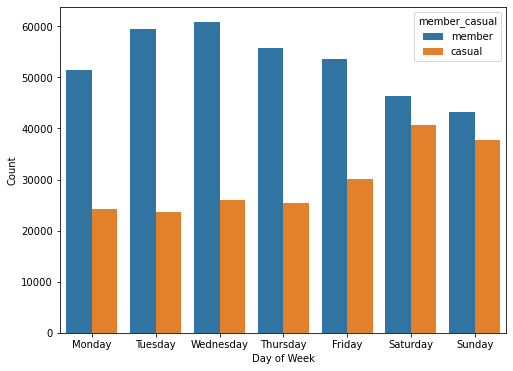

In [26]:
sns.countplot(data=trips22, x='start_dayofweek', hue='member_casual')
plt.xlabel('Day of Week')
plt.ylabel('Count');

The difference between member and casual during weekdays is very large compared to weekend. Which signify members uses this bike sharing system as channel of commute to work places, with little usage at weekend.

Monthly usage between members and casuals

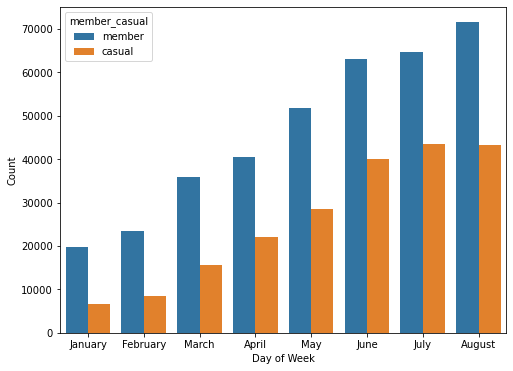

In [27]:
sns.countplot(data=trips22, x='start_month', hue='member_casual')
plt.xlabel('Day of Week')
plt.ylabel('Count');

The plot above shows the increasing pattern of trips with larger trips made by members.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

There are a lot of member than casual users and the riding habit varies alot between both user type. Members uses the bike sharing system for work commute thus having low average trip between on work days (Mon-Fri) whereas casual tends to ride for fun especially over the weekend. 


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

It is interesting to see that docked bike type have higher average trip duration with little difference in electric and classic bikes.

## Multivariate Exploration

How does the average trip duration vary between member and casual, and ride type

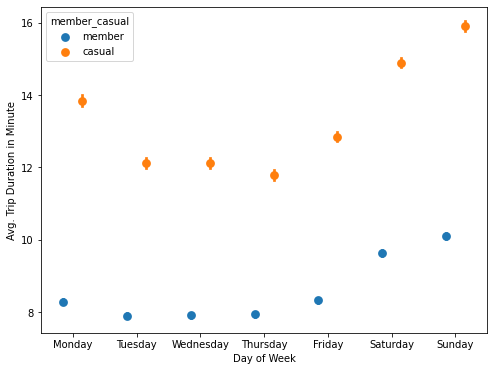

In [28]:
sns.pointplot(data=trips22, x='start_dayofweek', y='duration_minute', hue='member_casual', dodge=0.3, linestyles='')
plt.xlabel('Day of Week')
plt.ylabel('Avg. Trip Duration in Minute');

It can be seen from the above plot that members ride much shorter/quicker trips compared to casual  on each day of the week. Both user types have decrease trip duration trend between Monday to Thursday and increase between Thursday to Sunday.

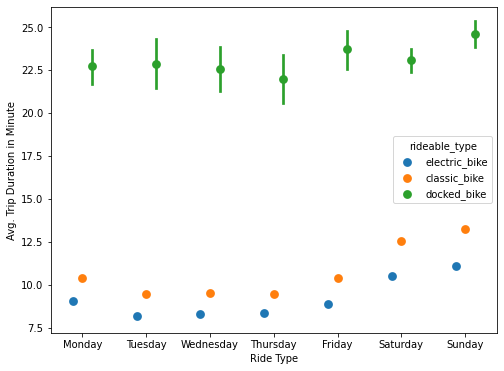

In [29]:
sns.pointplot(data=trips22, x='start_dayofweek', y='duration_minute', hue='rideable_type', dodge=0.3, linestyles='')
plt.xlabel('Ride Type')
plt.ylabel('Avg. Trip Duration in Minute');

From the above plot, docked bikes high avearge trip duration compared with to classic and elcectric bikes with little differnce between both.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The multivariate exploration strengthened some of the patterns discovered in the previous bivariate exploration as well as univariate exploration, the relationship between the multiple variables plotted are visualized altogether and information are presented combined. The short and efficient period of usage  for member between Monday through Friday indicate the use primarily for work commute. The more higher and flexible pattern of casual use shows that they are taking advantage of the bike sharing system quite differntly heavily over the weekends for city tour or leisure purposs probably.

### Were there any interesting or surprising interactions between features?

The interactions between features are all suplementing each other and quite make sense when looked at combined. There is no big surprised, except for high average trip duration of docked bikes compared to the electric and classic bikes.